<a href="https://colab.research.google.com/github/r6chow/IDC_Histopathology/blob/master/ExploratoryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from google.colab import drive
import numpy as np
import pickle
#import imageio  #for reading images
#import cv2
from PIL import Image
import matplotlib.pyplot as plt
import time

In [0]:
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
binary_fldr = '/content/drive/Shared drives/Roger Chow/Dataset/IDC_regular_ps50_idx5_BIN/'
bin_file =  'IDC_regular_ps50_idx5.p'
images = pickle.load(open(binary_fldr + bin_file, 'rb'))


In [0]:
# binary_fldr = '/content/drive/My Drive/IDC_regular_ps50_idx5_BIN/'

# len(os.listdir(binary_fldr))


In [0]:
# bin_files = os.listdir(binary_fldr)

# images = []
# for bin_file in bin_files:
#   #print (binary_fldr + bin_file)
#   #image_load = np.load(binary_fldr + file)
#   image_load = pickle.load( open( binary_fldr + bin_file, "rb" ) )
#   images += image_load

In [0]:
len(images)

277524

In [0]:
images[0]

{'class': '0',
 'file': '12893_idx5_x1001_y1101_class0.png',
 'id': '12893',
 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7FAE0CB662E8>,
 'x': 1001,
 'y': 1101}

## Viewing random patches

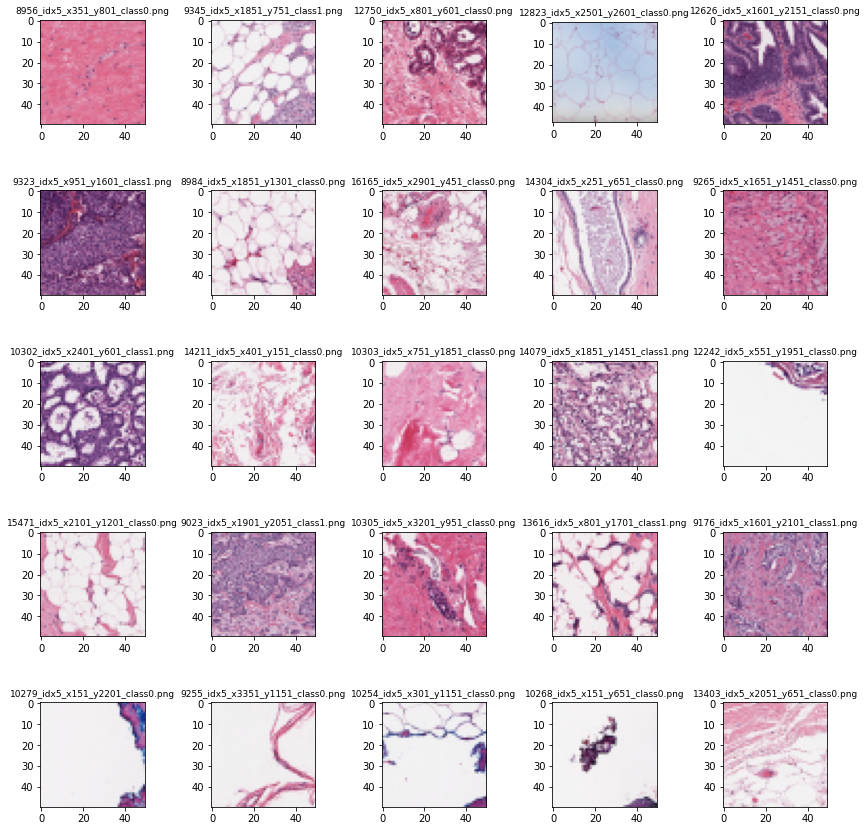

In [0]:
rdm_size = 25
num_fig = 5
#view random images
rdm_idx_list =  np.random.choice(range(len(images)), rdm_size, replace=False)

fig, axes = plt.subplots(num_fig, num_fig, figsize=(12,12))

for i in range(len(rdm_idx_list)):

  col = i % num_fig
  row = int(i / num_fig) 

  idx = rdm_idx_list[i]
  axes[row][col].set_title(images[idx]['file'], fontsize=9 )
  axes[row][col].imshow(images[idx]['img'])

plt.tight_layout()

## Viewing Cancer Patches

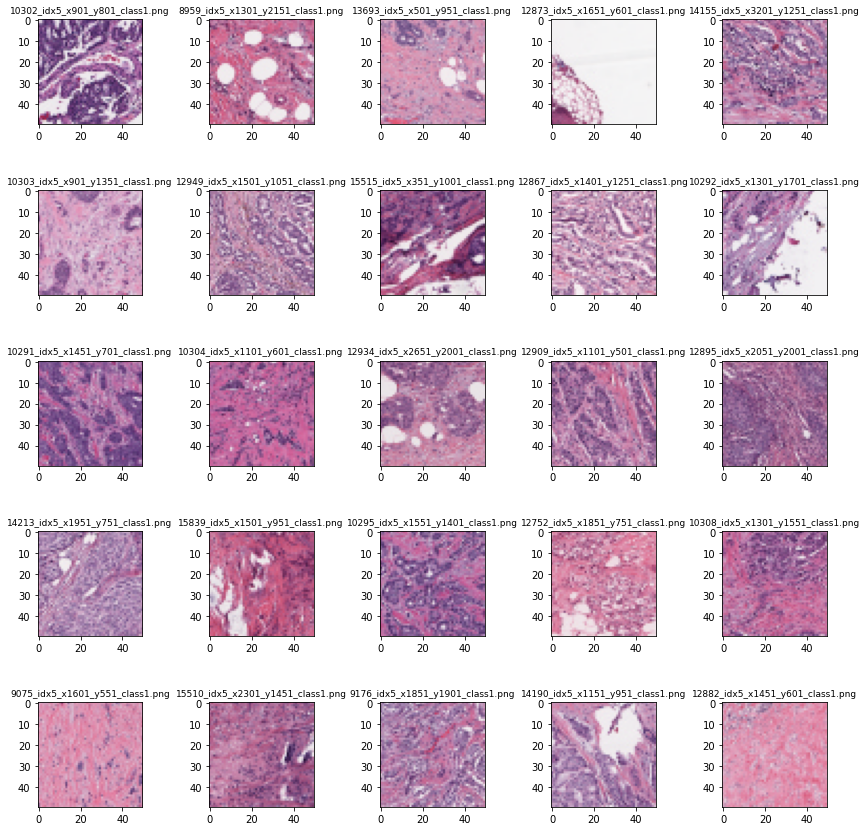

In [0]:
result_images = [img for img in images if img['class'] == '1']

rdm_size = 25
num_fig = 5
#view random images
rdm_idx_list =  np.random.choice(range(len(result_images)), rdm_size, replace=False)

fig, axes = plt.subplots(num_fig, num_fig, figsize=(12,12))

for i in range(len(rdm_idx_list)):

  col = i % num_fig
  row = int(i / num_fig) 

  idx = rdm_idx_list[i]
  axes[row][col].set_title(result_images[idx]['file'], fontsize=9 )
  axes[row][col].imshow(result_images[idx]['img'])

plt.tight_layout()

##Viewing Non-Cancer Patch

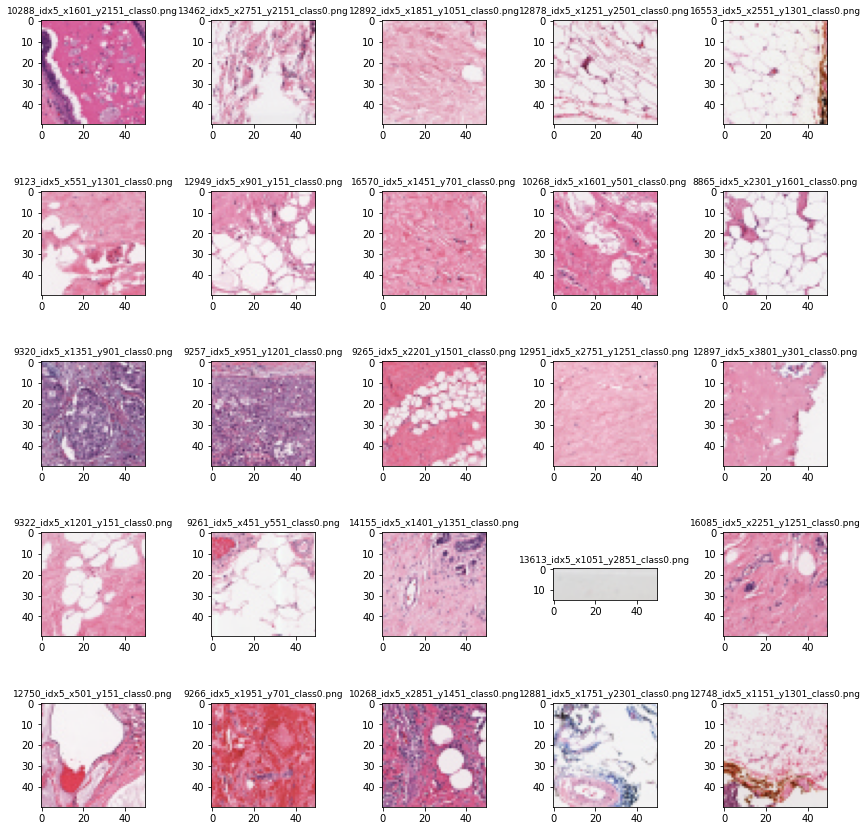

In [0]:
result_images = [img for img in images if img['class'] == '0']

rdm_size = 25
num_fig = 5
#view random images
rdm_idx_list =  np.random.choice(range(len(result_images)), rdm_size, replace=False)

fig, axes = plt.subplots(num_fig, num_fig, figsize=(12,12))

for i in range(len(rdm_idx_list)):

  col = i % num_fig
  row = int(i / num_fig) 

  idx = rdm_idx_list[i]
  axes[row][col].set_title(result_images[idx]['file'], fontsize=9 )
  axes[row][col].imshow(result_images[idx]['img'])

plt.tight_layout()

## Distribution of Cancer/Non-Cancer patches


([<matplotlib.patches.Wedge at 0x7fadeeb68860>,
 [Text(0.6907591564470219, 0.8560676303800997, 'cancer'),
  Text(-0.6907590762961828, -0.8560676950536357, 'non-cancer')])

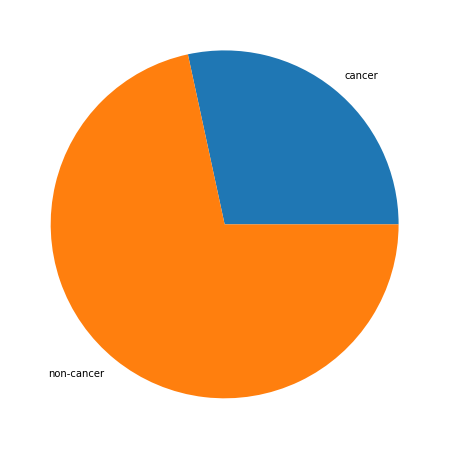

In [0]:
num_cancer = len([img for img in images if img['class'] == '1'])
num_non_cancer = len([img for img in images if img['class'] == '0'])

fig = plt.figure(figsize=(8,8))
plt.pie(x=[num_cancer, num_non_cancer], labels=['cancer', 'non-cancer'])

In [0]:
import re
m = re.match('([0-9]+)_idx5_x([0-d]+)_y([0-9]+).*', '9023_idx5_x1001_y1201_class0.png')
m.group(1,2,3)

('9023', '1001', '1201')

In [0]:

#extract additional metadata from file
for img in images:
  m = re.match('([0-9]+)_idx5_x([0-d]+)_y([0-9]+).*', img['file'])
  img['id'] = m.group(1)
  img['x'] =  int(m.group(2))
  img['y'] =  int(m.group(3))
  
images[0:3]

[{'class': '0',
  'file': '12893_idx5_x1001_y1101_class0.png',
  'id': '12893',
  'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7F6F2BAD8780>,
  'x': 1001,
  'y': 1101},
 {'class': '0',
  'file': '12893_idx5_x1001_y1151_class0.png',
  'id': '12893',
  'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7F6F2BAE1710>,
  'x': 1001,
  'y': 1151},
 {'class': '0',
  'file': '12893_idx5_x1001_y1051_class0.png',
  'id': '12893',
  'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7F6F2BAE1C18>,
  'x': 1001,
  'y': 1051}]

In [0]:
#list of ids
ids = np.unique([img['id'] for img in images])
ids[0:100]

array(['10253', '10254', '10255', '10256', '10257', '10258', '10259',
       '10260', '10261', '10262', '10264', '10268', '10269', '10272',
       '10273', '10274', '10275', '10276', '10277', '10278', '10279',
       '10282', '10285', '10286', '10288', '10290', '10291', '10292',
       '10293', '10295', '10299', '10300', '10301', '10302', '10303',
       '10304', '10305', '10306', '10307', '10308', '12241', '12242',
       '12626', '12748', '12749', '12750', '12751', '12752', '12810',
       '12811', '12817', '12818', '12819', '12820', '12821', '12822',
       '12823', '12824', '12826', '12867', '12868', '12869', '12870',
       '12871', '12872', '12873', '12875', '12876', '12877', '12878',
       '12879', '12880', '12881', '12882', '12883', '12884', '12886',
       '12890', '12891', '12892', '12893', '12894', '12895', '12896',
       '12897', '12898', '12900', '12901', '12905', '12906', '12907',
       '12908', '12909', '12910', '12911', '12929', '12930', '12931',
       '12932', '129

In [0]:
#get count of images for id
for i in ['10253']:
  print(i, ':', len([img for img in images if img['id'] == i]))

10253 : 552


In [0]:
a_list = [img['file'] for img in images  if img['id'] == '16165' and img['class'] == '1'] 
a_list

['16165_idx5_x1301_y2101_class1.png',
 '16165_idx5_x1301_y2051_class1.png',
 '16165_idx5_x1301_y2151_class1.png',
 '16165_idx5_x1301_y2351_class1.png',
 '16165_idx5_x1301_y2251_class1.png',
 '16165_idx5_x1301_y2301_class1.png',
 '16165_idx5_x1301_y2451_class1.png',
 '16165_idx5_x1301_y2201_class1.png',
 '16165_idx5_x1301_y2501_class1.png',
 '16165_idx5_x1301_y901_class1.png',
 '16165_idx5_x1351_y1151_class1.png',
 '16165_idx5_x1301_y951_class1.png',
 '16165_idx5_x1351_y1101_class1.png',
 '16165_idx5_x1301_y2651_class1.png',
 '16165_idx5_x1351_y1051_class1.png',
 '16165_idx5_x1351_y1001_class1.png',
 '16165_idx5_x1301_y2601_class1.png',
 '16165_idx5_x1301_y2551_class1.png',
 '16165_idx5_x1351_y1201_class1.png',
 '16165_idx5_x1351_y1351_class1.png',
 '16165_idx5_x1351_y1651_class1.png',
 '16165_idx5_x1351_y1401_class1.png',
 '16165_idx5_x1351_y1551_class1.png',
 '16165_idx5_x1351_y1251_class1.png',
 '16165_idx5_x1351_y1501_class1.png',
 '16165_idx5_x1351_y1451_class1.png',
 '16165_idx5_x

In [0]:
[img['file'] for img in images if img['id'] == '10253']

['10253_idx5_x1001_y1001_class0.png',
 '10253_idx5_x1001_y1151_class0.png',
 '10253_idx5_x1001_y1101_class0.png',
 '10253_idx5_x1001_y1051_class0.png',
 '10253_idx5_x1001_y1201_class0.png',
 '10253_idx5_x1001_y1501_class0.png',
 '10253_idx5_x1001_y1251_class0.png',
 '10253_idx5_x1001_y1301_class0.png',
 '10253_idx5_x1001_y1551_class0.png',
 '10253_idx5_x1001_y1351_class0.png',
 '10253_idx5_x1001_y1701_class0.png',
 '10253_idx5_x1001_y451_class0.png',
 '10253_idx5_x1001_y351_class0.png',
 '10253_idx5_x1001_y401_class0.png',
 '10253_idx5_x1001_y701_class0.png',
 '10253_idx5_x1001_y501_class0.png',
 '10253_idx5_x1001_y551_class0.png',
 '10253_idx5_x1001_y651_class0.png',
 '10253_idx5_x1001_y751_class0.png',
 '10253_idx5_x1001_y601_class0.png',
 '10253_idx5_x1001_y801_class0.png',
 '10253_idx5_x1051_y1051_class0.png',
 '10253_idx5_x1001_y951_class0.png',
 '10253_idx5_x1051_y1001_class0.png',
 '10253_idx5_x1051_y1101_class0.png',
 '10253_idx5_x1051_y1301_class0.png',
 '10253_idx5_x1051_y115

In [0]:
sample_images = [img for img in images if img['id'] == '15632']

In [0]:
min_x = min([img['x'] for img in sample_images])
max_x = max([img['x'] for img in sample_images])
min_y = min([img['y'] for img in sample_images])
max_y = max([img['y'] for img in sample_images])

patch_size = 50

print(min_x, max_x)
print(min_y, max_y)

1 3751
151 2801


In [0]:



# num_cols = int(( (max_x - min_x ) / patch_size) + 1) 
# num_rows = int(( (max_y - min_y ) / patch_size) + 1)

total_width = (max_x - min_x + 50)
total_height = (max_y - min_y + 50)

new_im = Image.new('RGB', (total_width, total_height))

for img in [i for i in sample_images]: # if i['x'] < 3501]:  #sorted(images, key=lambda i: (i['y'], i['x'])):
  new_im.paste(img['img'], (img['x'] - min_x ,img['y']-min_y))
 


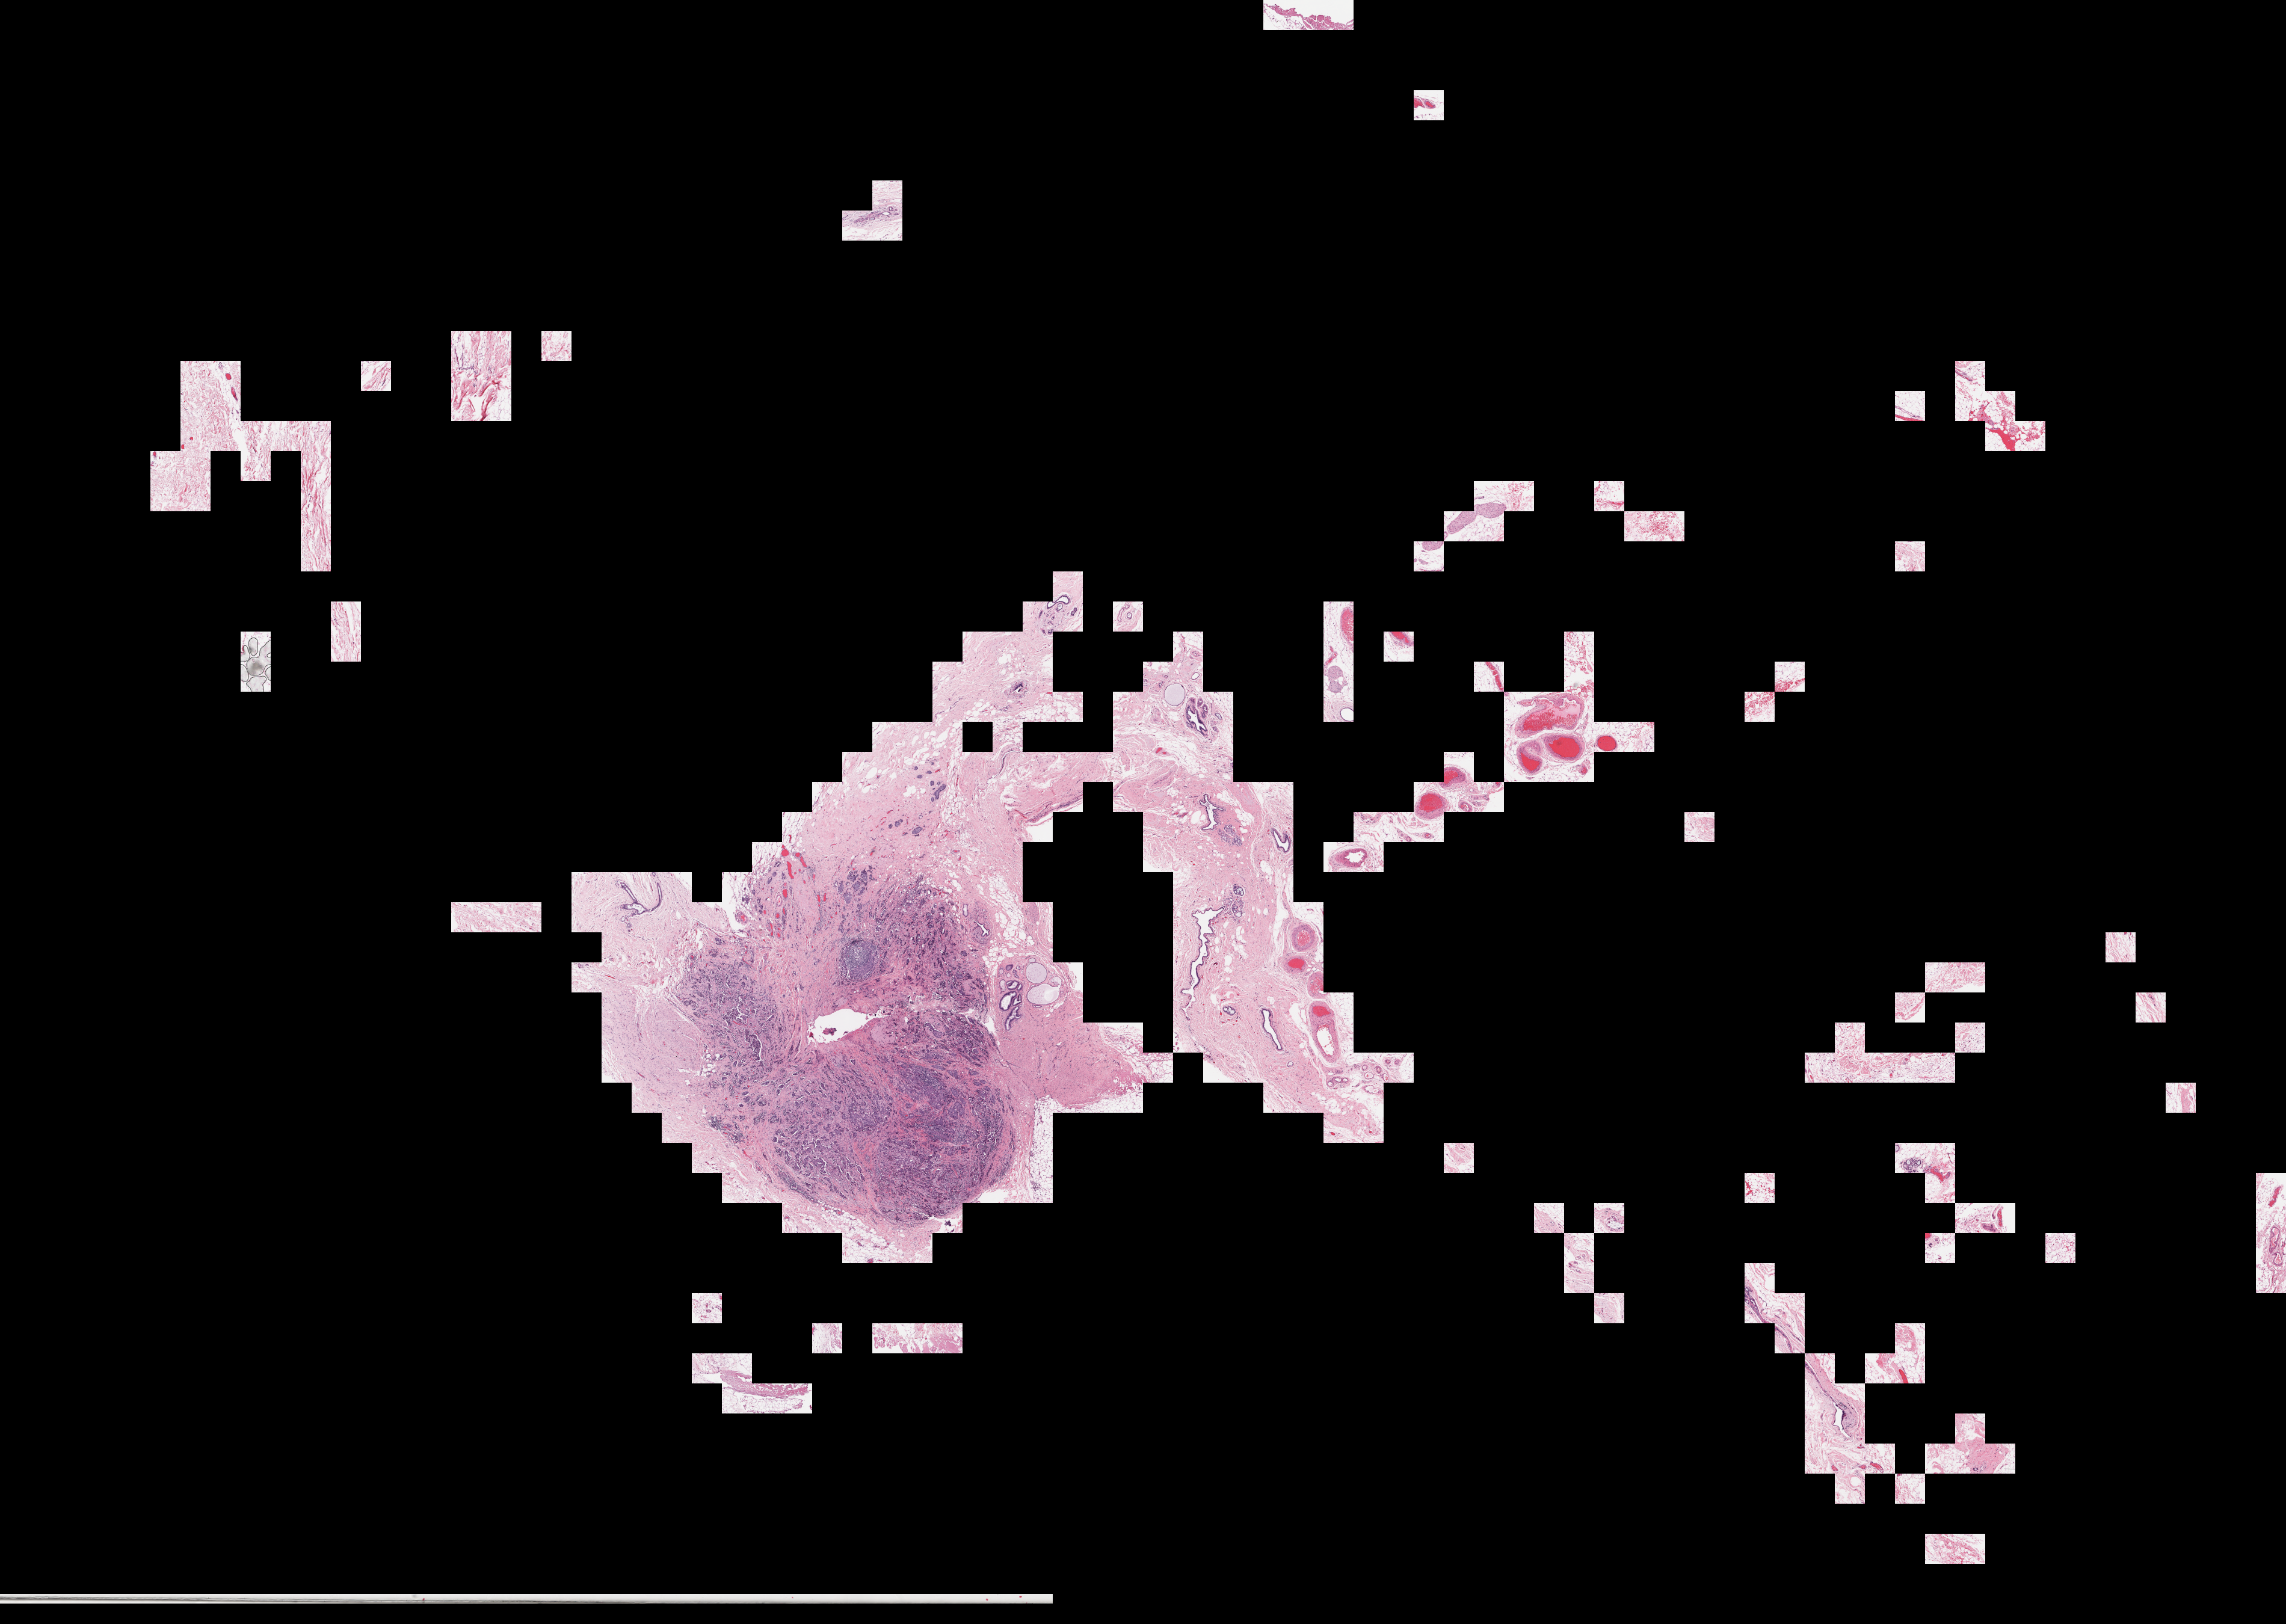

In [0]:
scale = 1
new_im.resize((int(total_width/scale), int(total_height/scale)))

In [0]:
def JoinImages(image_list, scale=4, patch_size=50):
  min_x = min([img['x'] for img in image_list])
  max_x = max([img['x'] for img in image_list])
  min_y = min([img['y'] for img in image_list])
  max_y = max([img['y'] for img in image_list])

  total_width = (max_x - min_x + patch_size)
  total_height = (max_y - min_y + patch_size)

  new_img = Image.new('RGB', (total_width, total_height))

  for img in [i for i in image_list]: 
    new_img.paste(img['img'], (img['x'] - min_x ,img['y']-min_y))

  return new_img.resize((int(total_width/scale), int(total_height/scale)))
  

{'file': '16166_idx5_x1001_y501_class0.png', 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7F113FA7FEB8>, 'class': '0', 'id': '16166', 'x': 1001, 'y': 501}
{'file': '9081_idx5_x1001_y501_class0.png', 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7F114596FA90>, 'class': '0', 'id': '9081', 'x': 1001, 'y': 501}
{'file': '10261_idx5_x1001_y1301_class0.png', 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7F113D0A1DD8>, 'class': '0', 'id': '10261', 'x': 1001, 'y': 1301}
{'file': '13460_idx5_x2401_y801_class0.png', 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7F11380B8860>, 'class': '0', 'id': '13460', 'x': 2401, 'y': 801}
{'file': '14212_idx5_x1001_y801_class0.png', 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=50x50 at 0x7F11460F25C0>, 'class': '0', 'id': '14212', 'x': 1001, 'y': 801}
{'file': '13025_idx5_x1001_y701_class0.png', 'img': <PIL.PngImagePlugin.PngImageFile image mode

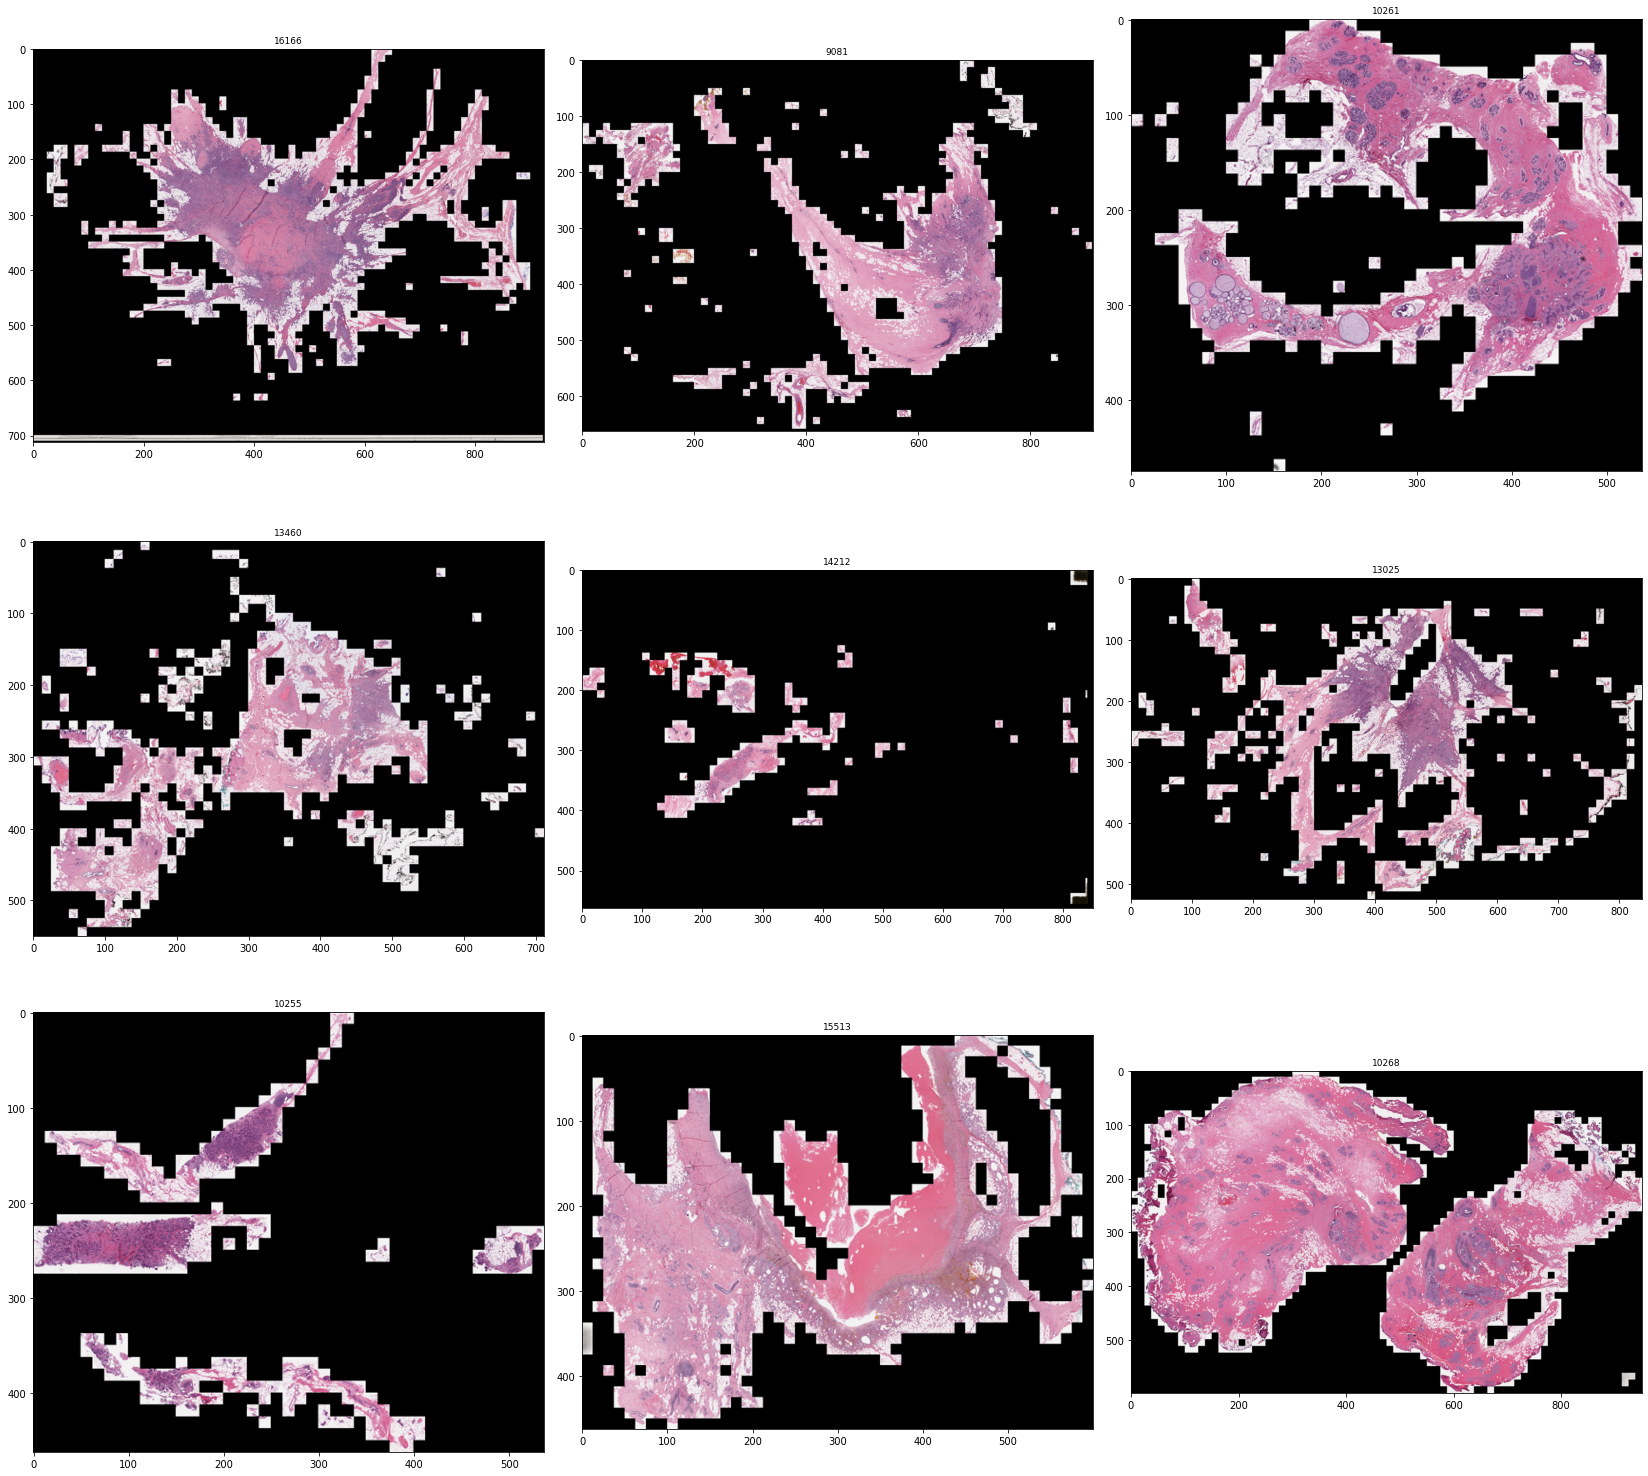

In [0]:
rdm_size = 9
num_fig = 3
rdm_id_list =  np.random.choice(ids, rdm_size, replace=False)

fig, axes = plt.subplots(num_fig, num_fig, figsize=(23,23))



for i, id in enumerate(rdm_id_list,):


  col = i % num_fig
  row = int(i / num_fig) 

  image_list = [img for img in images if img['id'] == id]
  print(image_list[0])
  img = JoinImages(image_list)

  axes[row][col].set_title(id, fontsize=9 )
  axes[row][col].imshow(img)

  plt.tight_layout()
